# Análise Estatística - RankSum e ANOVA

Nesta seção, apresentamos alguns métodos úteis para analisar seus dados em Python. Será mostrado como calcular a média, variância e erro padrão de um conjunto de dados. 

Para uma análise estatística mais avançada, cobrimos como realizar um teste RankSum de Mann-Whitney-Wilcoxon (MWW), como realizar uma análise de variância (ANOVA) entre vários conjuntos de dados e como calcular intervalos de confiança de inicialização de 95% para conjuntos de dados não normais


https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

DataFrames são úteis para quando você precisa calcular estatísticas em várias execuções replicadas.

In [1]:
from pandas import *

# must specify that blank space " " is NaN
df = read_csv("parasite_data.csv", na_values=[" "])
df.head()

,Virulence,Replicate,ShannonDiversity
0,0.5,1,0.059262
1,0.5,2,1.093600
2,0.5,3,1.139390
3,0.5,4,0.547651
4,0.5,5,0.065928


## Accessing data in pandas DataFrames

In [2]:
df['Virulence'].head()

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
Name: Virulence, dtype: float64

## Filtering data 

In [3]:
df[df["ShannonDiversity"] > 2.0].head()

,Virulence,Replicate,ShannonDiversity
8,0.5,9,2.04768
89,0.6,40,2.01066
92,0.6,43,2.90081
96,0.6,47,2.02915
105,0.7,6,2.23427


## Filtering Nan values

In [4]:
import numpy as np  
df[np.isnan(df["Virulence"])].head()

,Virulence,Replicate,ShannonDiversity
300,NaN,1,0.000000
301,NaN,2,0.000000
302,NaN,3,0.833645
303,NaN,4,0.000000
304,NaN,5,0.990309


Os métodos DataFrame ignoram automaticamente os valores NA / NaN.


In [5]:
print("Mean virulence across all treatments: {}".format( df["Virulence"].mean() ))


Mean virulence across all treatments: 0.7500000000000013


## Tratando dados ausentes

In [6]:
df = df.dropna()
df["Virulence"].dropna().head()

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
Name: Virulence, dtype: float64

In [7]:
df.fillna(0.0)["Virulence"].head()  

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
Name: Virulence, dtype: float64

## Estatística básica

Média e Variância

In [8]:
print ("Mean Shannon Diversity w/ 0.8 Parasite Virulence =",  
    df[df["Virulence"] == 0.8]["ShannonDiversity"].mean()) 

print ("Variance in Shannon Diversity w/ 0.8 Parasite Virulence =",  
    df[df["Virulence"] == 0.8]["ShannonDiversity"].var())

Mean Shannon Diversity w/ 0.8 Parasite Virulence = 1.2691338187999996
Variance in Shannon Diversity w/ 0.8 Parasite Virulence = 0.6110384333126732


Erro Padrão da Média (SEM)

In [9]:
from scipy import stats  
  
print ("SEM of Shannon Diversity w/ 0.8 Parasite Virulence =",  
    stats.sem(df[df["Virulence"] == 0.8]["ShannonDiversity"])) 

SEM of Shannon Diversity w/ 0.8 Parasite Virulence = 0.110547585529


Um único SEM geralmente envolverá 68% dos possíveis meios de replicação e duas SEMs envolverão 95% dos possíveis meios de replicação. Duas SEMs são chamadas de "intervalo estimado de confiança de 95%". O intervalo de confiança é estimado porque a largura exata depende de quantas repetições você tiver; Essa aproximação é boa quando você tem mais de 20 repetições.

** Mann-Whitney-Wilcoxon (MWW) RankSum test **

O teste MWW RankSum é um teste útil para determinar se duas distribuições são significativamente diferentes ou não. Ao contrário do teste t, o teste RankSum não assume que os dados sejam normalmente distribuídos, fornecendo potencialmente uma avaliação mais precisa dos conjuntos de dados.

Como exemplo, digamos que queremos determinar se os resultados dos dois tratamentos seguintes diferem significativamente ou não

In [10]:
treatment1 = df[df["Virulence"] == 0.5]["ShannonDiversity"]  
treatment2 = df[df["Virulence"] == 0.8]["ShannonDiversity"]  

In [11]:
"Data set 1:\n", treatment1.head()

('Data set 1:\n', 0    0.059262
 1    1.093600
 2    1.139390
 3    0.547651
 4    0.065928
 Name: ShannonDiversity, dtype: float64)

In [12]:
"Data set 2:\n", treatment2.head()

('Data set 2:\n', 150    1.433800
 151    2.079700
 152    0.892139
 153    2.384740
 154    0.006980
 Name: ShannonDiversity, dtype: float64)

Um teste RankSum fornecerá um valor P indicando se as duas distribuições são ou não iguais.

In [13]:
from scipy import stats  
  
z_stat, p_val = stats.ranksums(treatment1, treatment2)  
  
"MWW RankSum P for treatments 1 and 2 =", p_val

('MWW RankSum P for treatments 1 and 2 =', 0.00098335590273505771)

Se P <= 0,05, estamos altamente confiantes de que as distribuições diferem significativamente e podem afirmar que os tratamentos tiveram um impacto significativo no valor medido. 

Se os tratamentos não diferem significativamente, podemos esperar um resultado como o seguinte:

In [16]:
treatment3 = df[df["Virulence"] == 0.8]["ShannonDiversity"]  
treatment4 = df[df["Virulence"] == 0.9]["ShannonDiversity"]

In [17]:
"Data set 3:\n", treatment3.head()

('Data set 3:\n', 150    1.433800
 151    2.079700
 152    0.892139
 153    2.384740
 154    0.006980
 Name: ShannonDiversity, dtype: float64)

In [18]:
"Data set 4:\n", treatment4.head()

('Data set 4:\n', 200    1.036930
 201    0.938018
 202    0.995956
 203    1.006970
 204    0.968258
 Name: ShannonDiversity, dtype: float64)

In [19]:
# compute RankSum P value  
z_stat, p_val = stats.ranksums(treatment3, treatment4)   
"MWW RankSum P for treatments 3 and 4 =", p_val  

('MWW RankSum P for treatments 3 and 4 =', 0.99449957112420484)

Com P> 0,05, devemos dizer que as distribuições não diferem significativamente. 
Assim, mudar a virulência do parasita entre 0,8 e 0,9 não resulta em uma mudança significativa na Shannon Diversity.

# Análise de variância unidireccional (ANOVA)

Se você precisa comparar mais de dois conjuntos de dados ao mesmo tempo, uma ANOVA é a sua melhor aposta. Por exemplo, temos os resultados de três experimentos com intervalos de confiança de sobreposição de 95%, e queremos confirmar que os resultados para os três experimentos não são significativamente diferentes.

In [20]:
treatment1 = df[df["Virulence"] == 0.7]["ShannonDiversity"]  
treatment2 = df[df["Virulence"] == 0.8]["ShannonDiversity"]  
treatment3 = df[df["Virulence"] == 0.9]["ShannonDiversity"]

In [21]:
from scipy import stats  
      
f_val, p_val = stats.f_oneway(treatment1, treatment2, treatment3)  
  
"One-way ANOVA P =", p_val 

('One-way ANOVA P =', 0.38150948187410261)

Se P> 0,05, podemos afirmar com alta confiança que os resultados de todos os três experimentos não são significativamente diferentes.

# Verificando a normalidade da distribuição

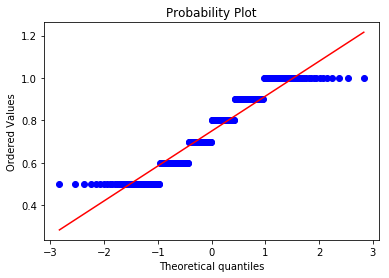

In [24]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df["Virulence"], dist="norm", plot=pylab)
pylab.show()

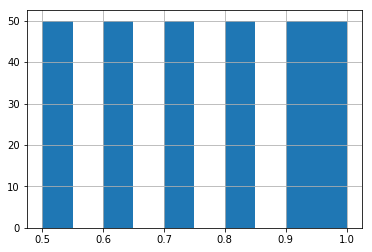

In [28]:
%matplotlib inline
df["Virulence"].hist()

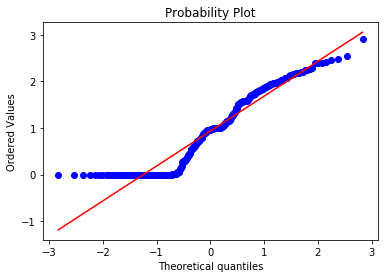

In [23]:
stats.probplot(df["ShannonDiversity"], dist="norm", plot=pylab)
pylab.show()

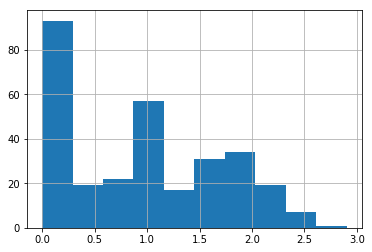

In [29]:
df["ShannonDiversity"].hist()

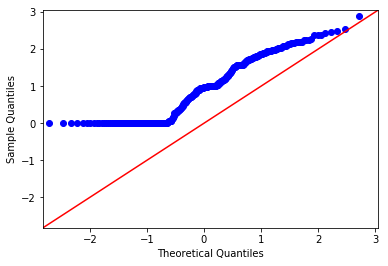

In [30]:
import numpy as np
import statsmodels.api as sm
import pylab
sm.qqplot(df["ShannonDiversity"], line='45')
pylab.show()